In [ ]:
                                                     # LEVEL 2, TASK 1                                   

In [ ]:
# LEVEL 2, TASK 1 - Table Booking and Online Delivery

import pandas as pd
df = pd.read_csv("dataset.csv")  

In [ ]:
table_booking_percent = df['Has Table booking'].value_counts(normalize=True) * 100
print("Table Booking (%):\n", table_booking_percent)

online_delivery_percent = df['Has Online delivery'].value_counts(normalize=True) * 100
print("\nOnline Delivery (%):\n", online_delivery_percent)


Table Booking (%):
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Online Delivery (%):
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [ ]:
# Compare Average Ratings for Table Booking

avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage Ratings (Table Booking vs Not):\n", avg_rating_table_booking)



Average Ratings (Table Booking vs Not):
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [ ]:
# Online Delivery Availability by Price Range

online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print("\nOnline Delivery Distribution by Price Range:\n", online_delivery_by_price)



Online Delivery Distribution by Price Range:
 Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444


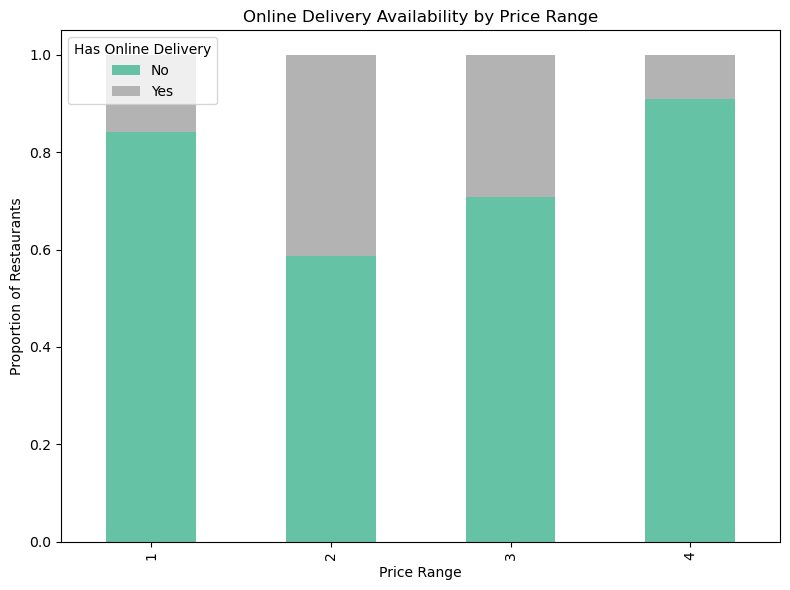

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants")
plt.legend(title="Has Online Delivery")
plt.tight_layout()
plt.show()


In [ ]:
                                                        # LEVEL 2, TASK 2

In [ ]:
# LEVEL 2, TASK 2 - Price Range Analysis

most_common_price_range = df['Price range'].mode()[0]
print("Most common price range:", most_common_price_range)

# You can also see all counts
print("\nAll price range counts:")
print(df['Price range'].value_counts())


Most common price range: 1

All price range counts:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


In [ ]:
# Calculate the Average Rating for Each Price Range

avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().sort_index()
print("\nAverage rating for each price range:")
print(avg_rating_by_price_range)



Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [ ]:
# Identify the Color That Represents the Highest Average Rating

best_price_range = avg_rating_by_price_range.idxmax()

color_for_best_range = df[df['Price range'] == best_price_range]['Rating color'].mode()[0]
print(f"\nPrice range with highest average rating: {best_price_range}")
print(f"Most common rating color for that price range: {color_for_best_range}")



Price range with highest average rating: 4
Most common rating color for that price range: Yellow


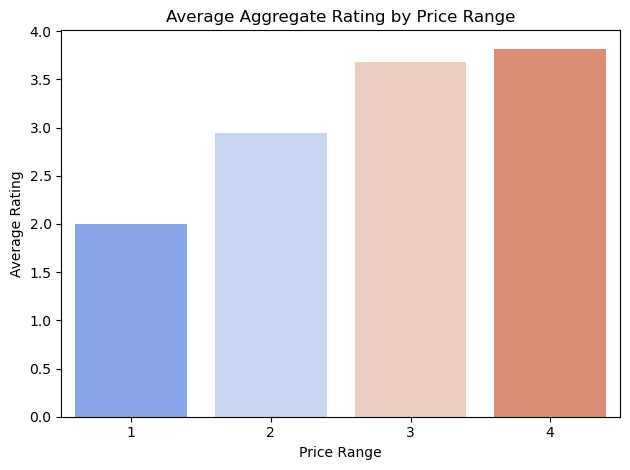

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=avg_rating_by_price_range.index, y=avg_rating_by_price_range.values, palette="coolwarm")
plt.title("Average Aggregate Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


In [ ]:
                                                         # LEVEL 2, TASK 3

In [ ]:
# LEVEL 2, TASK 3 - Feature Engineering

df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))

df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head()


,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


In [11]:
# Encode 'Yes' as 1 and 'No' as 0
df['Has Table Booking (Encoded)'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery (Encoded)'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Preview the changes
df[['Has Table booking', 'Has Table Booking (Encoded)', 'Has Online delivery', 'Has Online Delivery (Encoded)']].head()


,Has Table booking,Has Table Booking (Encoded),Has Online delivery,Has Online Delivery (Encoded)
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0


In [ ]:
# Check for Nulls in New Features

print(df[['Restaurant Name Length', 'Address Length',
          'Has Table Booking (Encoded)', 'Has Online Delivery (Encoded)']].isnull().sum())


Restaurant Name Length           0
Address Length                   0
Has Table Booking (Encoded)      0
Has Online Delivery (Encoded)    0
dtype: int64


In [ ]:
                                                          # LEVEL 3 , TASK 1

In [ ]:
# LEVEL 3 , TASK 1 - Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features for modeling
features = [
    'Price range', 'Votes', 'Has Table Booking (Encoded)', 
    'Has Online Delivery (Encoded)', 'Restaurant Name Length', 'Address Length'
]

# Drop rows with missing values
df_model = df.dropna(subset=features + ['Aggregate rating'])

X = df_model[features]
y = df_model['Aggregate rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"R² Score: {r2:.3f}")



Linear Regression:
Mean Squared Error: 1.678
R² Score: 0.263

Decision Tree:
Mean Squared Error: 0.231
R² Score: 0.899

Random Forest:
Mean Squared Error: 0.125
R² Score: 0.945


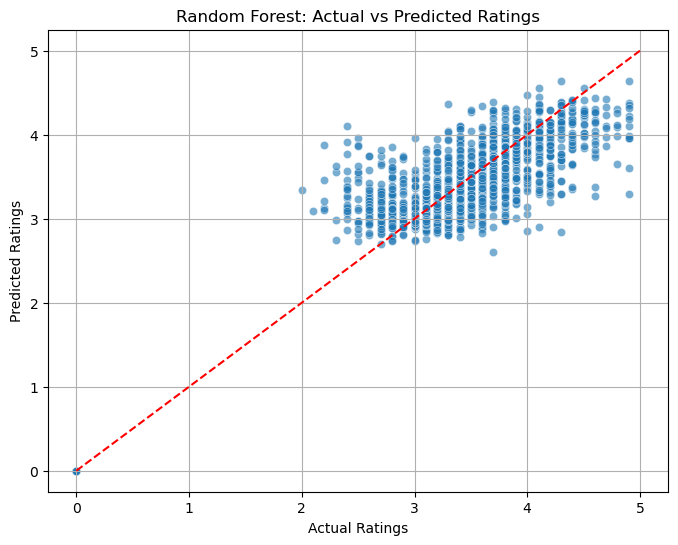

In [ ]:
# Visualize Predictions vs Actual Ratings

import matplotlib.pyplot as plt
import seaborn as sns

# Predict with Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Random Forest: Actual vs Predicted Ratings")
plt.plot([0, 5], [0, 5], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()


In [ ]:
                                                             # LEVEL 3, TASK 2

In [ ]:
# LEVEL 3, TASK 2 - Customer Preference Analysis

# Clean 'Cuisines' column
df_clean = df.dropna(subset=["Cuisines", "Aggregate rating", "Votes"])
df_clean["Cuisines"] = df_clean["Cuisines"].astype(str)
df_clean["Primary Cuisine"] = df_clean["Cuisines"].apply(lambda x: x.split(",")[0].strip())

# Average rating by primary cuisine
avg_rating_by_cuisine = df_clean.groupby("Primary Cuisine")["Aggregate rating"].mean().sort_values(ascending=False)

# Total votes by cuisine
votes_by_cuisine = df_clean.groupby("Primary Cuisine")["Votes"].sum().sort_values(ascending=False)

# Combine both into a single DataFrame
cuisine_analysis = pd.DataFrame({
    "Average Rating": avg_rating_by_cuisine,
    "Total Votes": votes_by_cuisine
}).sort_values(by="Total Votes", ascending=False)

# Display top 10 cuisines
cuisine_analysis.head(10)


C:\Users\parma\AppData\Local\Temp\ipykernel_12360\2812641313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Cuisines"] = df_clean["Cuisines"].astype(str)
C:\Users\parma\AppData\Local\Temp\ipykernel_12360\2812641313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Primary Cuisine"] = df_clean["Cuisines"].apply(lambda x: x.split(",")[0].strip())


,Average Rating,Total Votes
Primary Cuisine,,
North Indian,2.399699,356684
Cafe,3.232415,116576
American,3.555755,105447
Italian,3.453846,95153
Continental,3.606809,94569
Chinese,2.325731,84918
European,3.887097,45842
Fast Food,2.351042,42617
Bakery,2.332206,42008


In [ ]:
                                                            # LEVEL 3, TASK 3

In [ ]:
# LEVEL 3, TASK 3 - Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


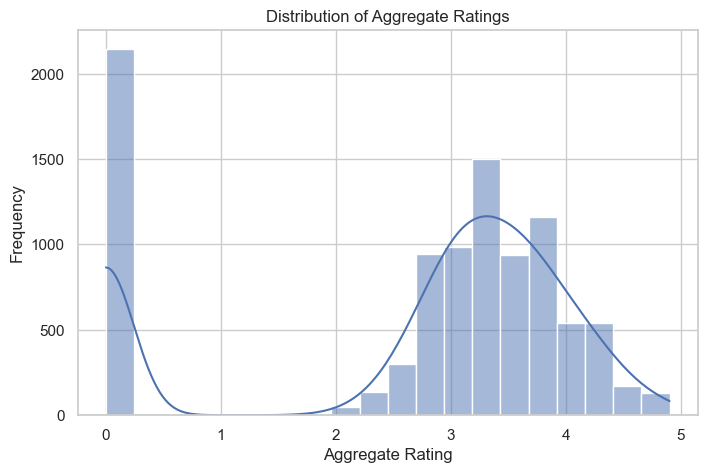

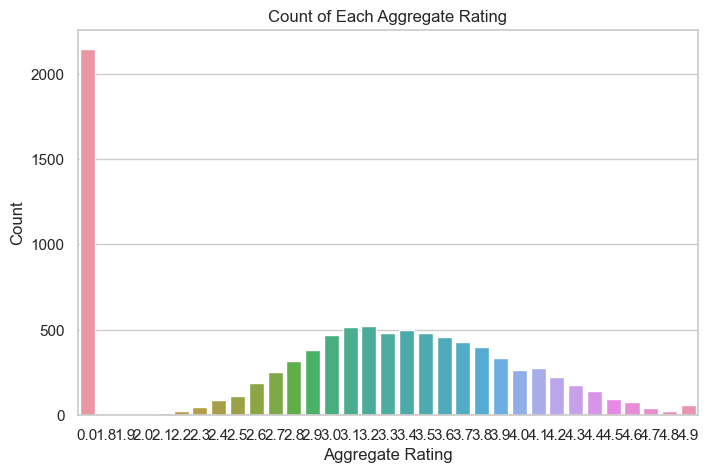

In [20]:
# Histogram of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Bar plot for rating counts
plt.figure(figsize=(8, 5))
sns.countplot(x='Aggregate rating', data=df)
plt.title('Count of Each Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


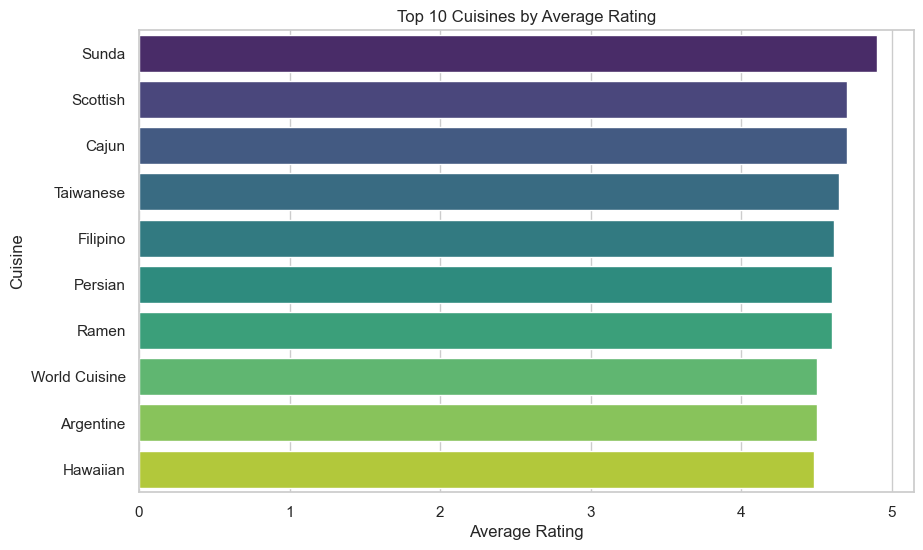

In [ ]:
# Clean and extract primary cuisine
df['Primary Cuisine'] = df['Cuisines'].astype(str).apply(lambda x: x.split(",")[0].strip())

# Average rating by cuisine
top_cuisines = df.groupby('Primary Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


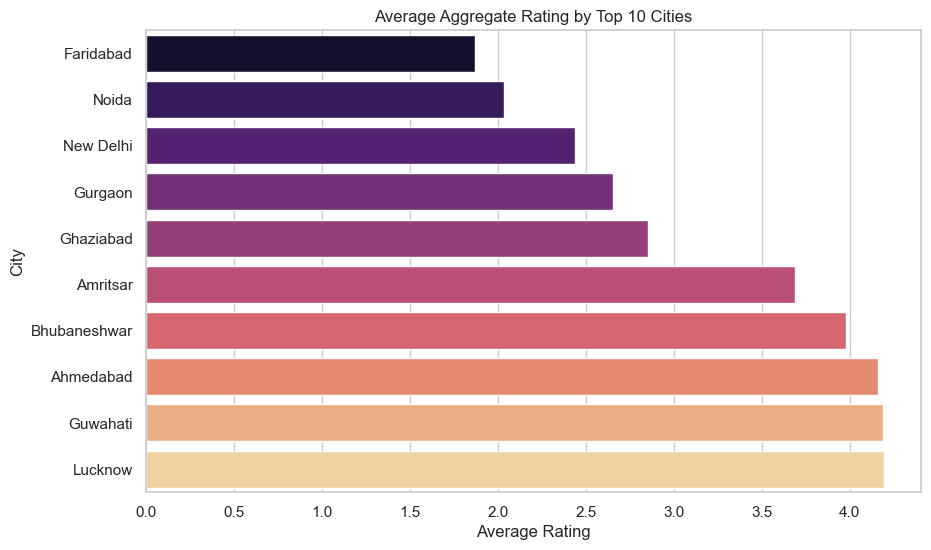

In [22]:
top_cities = df['City'].value_counts().head(10).index
avg_rating_city = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='magma')
plt.title('Average Aggregate Rating by Top 10 Cities')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


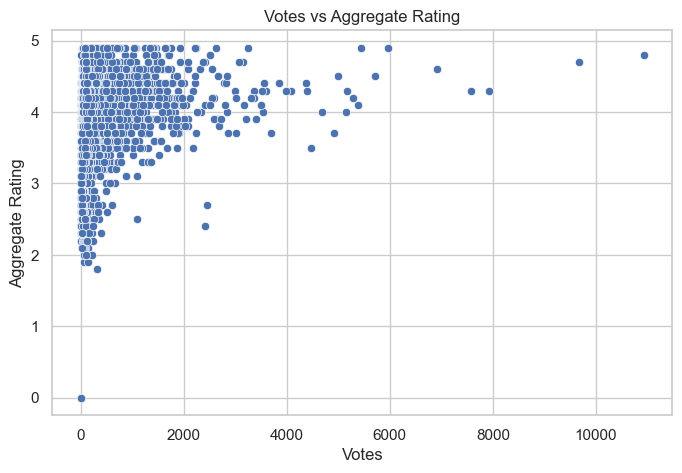

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()


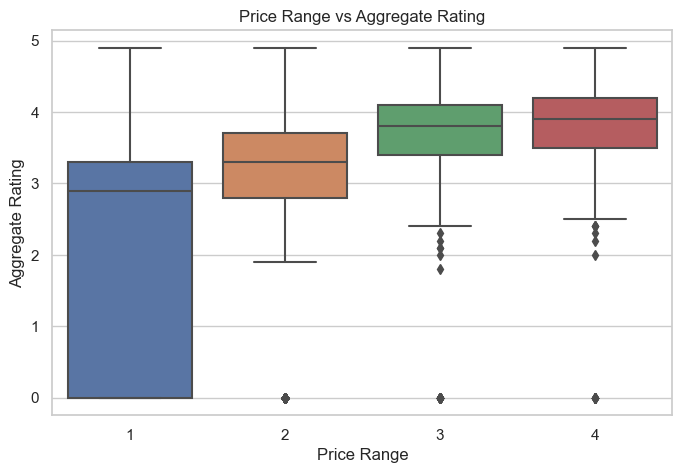

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Price Range vs Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()
